# Stock Price Prediction

Stock price dataset is a type of **time-series data**. Both *neural* and *non-neural* approaches are helpful for analysing that kind of data. The approaches for modeling the time-series data are also known as **Sequence Modeling** techniques. 

In this code, we use the simple ARIMA method for modeling the stock price. Thus, we can predict the stock price for the future.


**#YOUR_JOB**

Please complete the code specified by #YOUR_JOB according to the comments.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from time import time

# Data

We import the dataset using `pandas` package. 

**#YOUR_JOB**

Read the stock datasets, named `AMZN_2006-01-01_to_2018-01-01.csv`. Don't forget to upload it to the colab machine first. Note that the dataset is one of the stock data from [the kaggle DJIA 30 Stock Time Series](https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231). 


In [ ]:
print("Getting data ...")

data = #-------YOUR CODE HERE -------
print("Data is ready.")

data.head()


#### 1.1. Plots
The raw dataset contains `Date`, `Open`, `High`, `Low`, `Close`, `Volume`, and `Name`. We use the close value for the modeling task. We plot the closing price and its autocorrelation here.

**Note:** Please note that utilizing the ARIMA model, no preprocessing is needed for this dataset.

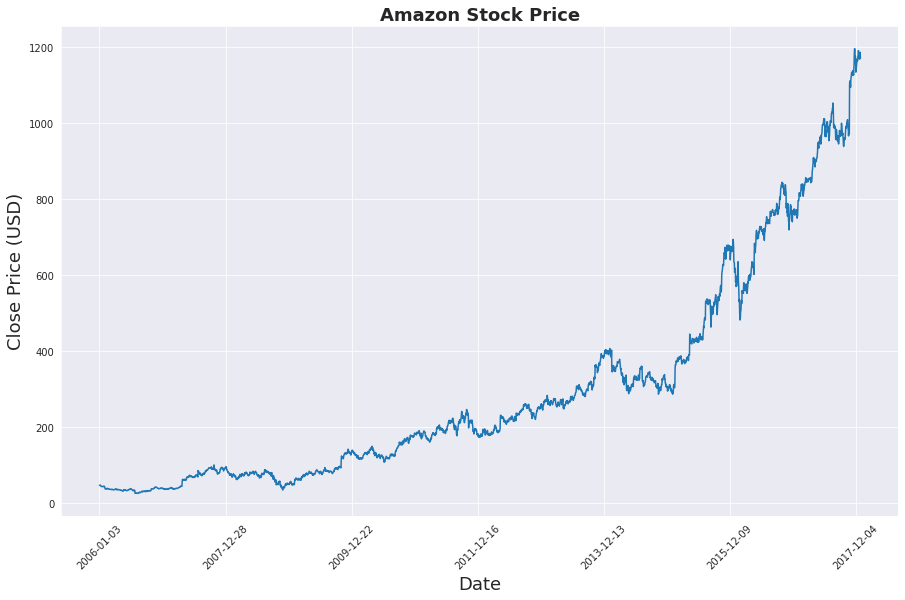

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data[['Close']])
plt.xticks(range(0, data.shape[0], 500), data['Date'].loc[::500], rotation=45)
plt.title("Amazon Stock Price", fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show()

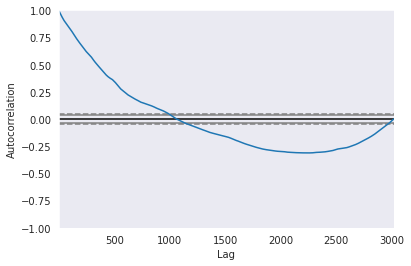

In [ ]:
autocorrelation_plot(data['Close'])
plt.show()


#### 1.2. Split Data

In [ ]:
size = 10
train, test = data[0:size], data[size:]
history = list(train["Close"])
test = list(test["Close"])


# ARIMA

#### 2.1. Fit Model

We fit the ARIMA model for every single point prediction according to the `history`. We keep the predictions in a list to compute the final *mean square error*.


**#YOUR_JOB**

The `for` loop in the following code should be repeated for the number of test samples. Complete the code for that purpose.

Also you need to instantiate an object from the `ARIMA` class with two parameters:
* `history`
* order (e.g. `order=(2, 2, 0)`)

[This page](https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima_model.ARIMA.html) may help you for the `ARIMA` class.

In [ ]:
tic = time()

predictions = list()
for t in #-----YOUR CODE HERE------

    model = #-----YOUR CODE HERE------
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()

    predictions.append(output[0])
    history.append(test[t])        # free-running or teacher-forcing 

tac = time()
print("It took %d min." % ((tac-tic)/60))



It took 2 min.


#### 2.2. Evaluations

We calculate the **MSE** for the prediction error. 

**#YOUR_JOB**

Call the `mean_squared_error` with the following two parameter to calculate the **MSE**
* `test`
* `predictions`

Test MSE: 63.418


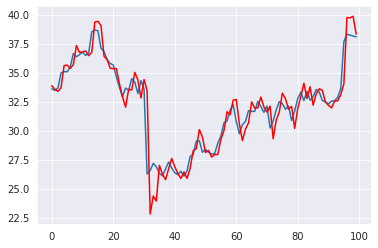

In [ ]:
error = #-----YOUR CODE HERE------
print('Test MSE: %.3f' % error)


# plot
plt.plot(test[100:200])
plt.plot(predictions[100:200], color='red')
plt.show()

**#YOUR_JOB**

Keep the last 10 data points for free-running.

Plot the prediction and true series. 

Analize the results.

In [1]:
#------ YOUR CODE HERE --------